In [1]:
# Fill in your name using the format below and student ID number
your_name = "LAST_NAME, FIRST_NAME"
student_id = "YOUR_ID"

# Assignment 1
We will study some more algorithms on the [Fashion-MNIST dataset](https://www.openml.org/d/40996).
As we saw in the first lab session, it contains 70,000 images of fashion products, classified into 10 
types of clothing, each represented by 28 by 28 pixel values. 

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import time
import tqdm

In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = openml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [4]:
# Plotting functions. Don't edit these.
%matplotlib inline
from IPython import display

def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0,1), ylabel='score', marker = '.'):
    """ Renders a plot that updates with every evaluation from evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 10))
    ylabel -- the y-axis title
    """
    # Plot interactively
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)
    
    # Make the scale look nice
    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)
        
    # Start from empty plot, then fill it
    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i) 
        if i == param_range[0]: # initialize series
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = marker, label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys(): # append new data
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)

### Question 1.1
Implement a function `evaluate_SVM` that evaluates an SVM with RBF kernel for a given gamma value and returns the train and test score

In [5]:
# Implement
def evaluate_SVM(X, y, gamma):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    gamma -- the value for the gamma parameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    pass

In [6]:
# MODEL IMPLEMENTATION:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
def evaluate_SVM(X, y, gamma):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    gamma -- the value for the gamma parameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    score = cross_validate(SVC(gamma=gamma), X, y, return_train_score= True, n_jobs=-1)
    res = {'train': np.mean(score['train_score']),
           'test': np.mean(score['test_score'])}
    return res

Implement a function `plot_1` that plots the results of `evaluate_SVM` on a 1% stratified subsample of the FMNIST dataset for gamma values ranging from 1e-12 to 1e12 (25 values on a log scale). You can use the plotting functions `plot_live` defined above.

In [7]:
# Implement
def plot_1():
    pass
plot_1()

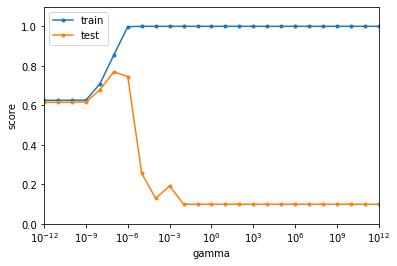

In [8]:
# MODEL IMPLEMENTATION:
def plot_1():
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.01)
    param_name = 'gamma'
    param_range = np.logspace(-12, 12, num=25)
    plot_live(Xs, ys, evaluate_SVM, param_name, param_range, scale='log', ylim=(0,1.1))
plot_1()

### Question 1.2
Interpret the graph. Answer the following questions with multiple choice:  
- 'A': Underfitting
- 'B': Overfitting
- 'C': Neither underfitting nor overfitting
- 'D': No answer

For the gamma value 1e-9, is the model over- or underfitting?

In [9]:
# Fill in the correct answer, e.g. 'A'. Don't change the name of the variable
q_1_2_1 = 'A'

For the gamma value 1e3, is the model over- or underfitting?

In [10]:
# Fill in the correct answer, e.g. 'A'. Don't change the name of the variable
q_1_2_2 = 'B'

### Question 2.1
Implement a function `time_SVM` that measures the train and predict time of an SVM with RBF kernel for a given sample size (training set size). Use the default gamma value. The same data can be used for training and prediction since we only care about the running time.

In [11]:
# Implement
def time_SVM(X, y, sample_size):
    """ Measure how long it takes to train a single SVM model and how fast it predicts. Run the algorithms on one core only.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    sample_size -- the percentage of the data that should be used for training and testing
    
    Returns: a dictionary with the measured time in seconds, e.g. {"fit": 12.1, "predict": 1.95}
    """
    pass

In [12]:
# MODEL IMPLEMENTATION:
def time_SVM(X, y, sample_size):
    """ Measure how long it takes to train a single SVM model and how fast it predicts. 
    Run the algorithms on one core only. Use stratified sampling to subsample the data.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    sample_size -- the percentage of the data that should be used for training and testing
    
    Returns: a dictionary with the measured time in seconds, e.g. {"fit": 12.1, "predict": 1.95}
    """
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=sample_size, random_state=1)
    start = time.time()
    svm = SVC().fit(Xs, ys)
    middle = time.time()
    svm.predict(Xs)
    end = time.time()
    res = {'fit': (middle - start),
           'predict': (end - middle)}
    return res

Implement a function `plot_2` that plots the results of `time_SVM` for a sample size between 0.001 and 0.05 of the full FMNIST dataset. Use at least 10 different values, on a log scale. You can again use the plotting functions `plot_live` defined above.

In [13]:
# Implement
def plot_2():
    pass
plot_2()

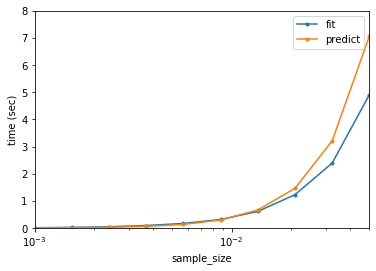

In [14]:
# MODEL IMPLEMENTATION:
def plot_2():
    param_name = 'sample_size'
    param_range = np.geomspace(0.001, 0.05, num=10)
    plot_live(X, y, time_SVM, param_name, param_range, scale='log', ylim=(0,8), ylabel='time (sec)')
plot_2()

### Question 2.2
Interpret the graph. What do you observe?  
- 'A': Fitting takes longer than predicting
- 'B': Predicting takes longer than fitting
- 'C': Fitting and predicting take exactly equally long
- 'D': No answer

In [15]:
# Fill in the correct answer, e.g. 'A'. Don't change the name of the variable
q_2_2 = 'B'

Note: This result is expected for sklearn 0.22 or later, where the default value for gamma is the 'scale' heuristic, which is much better here because the data is not completely normalized. Using sklearn 0.21 or earlier will cause a different result. In any case the answer must match the observed behavior.

### Question 2.3
Run the plot again, but this time using a function `time_SVM_tuned` which is the same as `time_SVM` except that it uses gamma=1e-5 rather than the default gamma value.

In [16]:
# Implement
def time_SVM_tuned(X, y, sample_size):
    """ Measure how long it takes to train a single SVM model and how fast it predicts. 
    Run the algorithms on one core only. Use stratified sampling to subsample the data.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    sample_size -- the percentage of the data that should be used for training and testing
    
    Returns: a dictionary with the measured time in seconds, e.g. {"fit": 12.1, "predict": 1.95}
    """
    pass

# Implement
def plot_3():
    pass
plot_3()

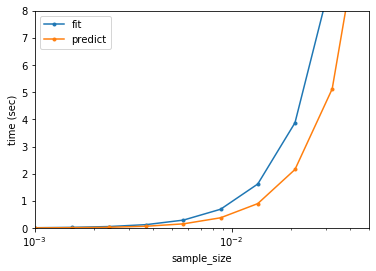

In [17]:
# MODEL IMPLEMENTATION:

def time_SVM_tuned(X, y, sample_size):
    """ Measure how long it takes to train a single SVM model and how fast it predicts. 
    Run the algorithms on one core only. Use stratified sampling to subsample the data.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    sample_size -- the percentage of the data that should be used for training and testing
    
    Returns: a dictionary with the measured time in seconds, e.g. {"fit": 12.1, "predict": 1.95}
    """
    
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=sample_size)
    start = time.time()
    svm = SVC(gamma=1e-5).fit(Xs, ys)
    middle = time.time()
    svm.predict(Xs)
    end = time.time()
    res = {'fit': (middle - start),
           'predict': (end - middle)}
    return res

def plot_3():
    param_name = 'sample_size'
    param_range = np.geomspace(0.001, 0.05, num=10)
    plot_live(X, y, time_SVM_tuned, param_name, param_range, scale='log', ylim=(0,8), ylabel='time (sec)')
plot_3()

### Question 2.4
What do you observe? Which differences do you see? For each difference, explain what may cause the effect. Answer inside the multi-line string. Use less than 400 characters. 

In [18]:
# Fill in your answer
q_2_4_answer = """
The fit and predict times are lower for the default gamma value. 
From question 1.1 we know that gamma=1e-5 causes overfitting. 
Solving the SVM for gamma=1e-5 requires more support vectors, thus a longer fit time 
(to learn the coefficients) and predict time (every prediction looks at all support vectors). 
The default yields a much better fit, training is even faster than predicting.
"""

In [19]:
# Check your answer's length
print("Your answer is {} characters long".format(len(q_2_4_answer))) 

Your answer is 390 characters long


To confirm that this effect is indeed related to the number of support vectors, we 
can vary gamma while also plotting the number of support vectors. See below.

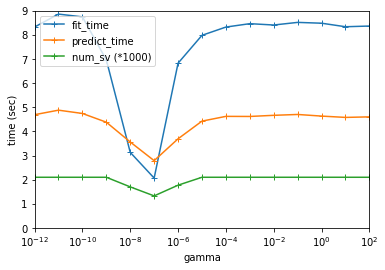

In [20]:
def time_SVM_gamma(X, y, gamma):
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.03)
    start = time.time()
    svm = SVC(gamma=gamma).fit(Xs, ys)
    middle = time.time()
    svm.predict(Xs)
    end = time.time()
    res = {'fit_time': (middle - start),
           'predict_time': (end - middle),
           'num_sv (*1000)': len(svm.support_vectors_)/1000}
    return res

def plot_4():
    param_name = 'gamma'
    param_range = np.logspace(-12, 2, num=15)
    plot_live(X, y, time_SVM_gamma, param_name, param_range, scale='log', ylim=(0,9), 
              ylabel='time (sec)', marker = '+')
plot_4()

We can see that the predict time almost directly follows the number of support vectors.
The fit time is affected more dramatically, and briefly dips below the predict time for optimal gamma settings. 
If gamma is too small (large radius) the model is underfitting and thanks to slack variables there are datapoints on both sides of the
decision boundary, hence a large number of support vectors. If gamma is too big (small radius), the model is overfitting with a
decision boundary that can draw circles around each data points in the training set making them all support vectors and making the solver
slow again.
In short, tuning gamma is important, both for increasing the accuracy of the model and to train and predict efficiently.

To confirm that the default gamma is indeed a better fit, and has fewer support vectors:

In [21]:
def evaluate(Xs, ys, name, svm):   
    cv = cross_validate(svm, Xs, ys, return_train_score= True,
                           return_estimator=True, n_jobs=-1)
    print("{}: {:.2f} train ACC, {:.2f} test ACC, {} support vectors".format(
        name, np.mean(cv['train_score']), np.mean(cv['test_score']), 
        np.mean([len(m.support_vectors_) for m in cv['estimator']])))

Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.03)
evaluate(Xs, ys, "Default   ",SVC())
evaluate(Xs, ys, "gamma=1e-5",SVC(gamma=1e-5))

Default   : 0.88 train ACC, 0.81 test ACC, 1116.0 support vectors
gamma=1e-5: 1.00 train ACC, 0.24 test ACC, 1680.0 support vectors


Alternatively, we can look up what is the default value. The documentation says that it uses the heuristic $\frac{1}{n_{features} * X.var()}$. Let's compute it:

In [22]:
nr_features = Xs.shape[1]
X_var = np.array(Xs).var()
1/(nr_features*X_var)

1.5853126960246029e-07

We can also verify this by looking at the internal variables of the classifier:

In [23]:
svc = SVC().fit(Xs, ys)
svc._gamma

1.5853126960246013e-07

This is very close to the optimal solution we saw in question 1.1, which was 1e-7. 
Hence, the default heuristic works very nicely in this case.